# Чтение файла и вывод основной информации

In [421]:
# импортирую необходимые библиотеки для работы с датасетом и создания графиков
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [422]:
# загружаю датасет в переменную, сразу убирая дубликаты и вывожу краткую информацию по нему
df = pd.read_csv('main.csv').drop_duplicates()
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5.0,7.0,1.0,34.6,9000000.0,1978,-1.0,-1,-1.0,-1,18 м²,8 м²,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14.0,45.0,1.0,41.3,12800000.0,2026,-1.0,-1,-1.0,Без отделки,20 м²,11 м²,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10.0,12.0,1.0,34.4,19372498.0,2026,-1.0,Монолитно-кирпичный,-1.0,"Без отделки, черновая, чистовая","11,8 м²","11,7 м²",7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4.0,33.0,1.0,42.9,23600000.0,-1,-1.0,-1,-1.0,-1,"22,9 м²",15 м²,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1.0,16.0,1.0,37.7,9450000.0,1982,-1.0,-1,-1.0,-1,-1,-1,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


In [423]:
# смотрю на размер датасета
df.shape

(10582, 24)

In [424]:
# вывожу краткую информацию по признакам, чтобы с ними ознакомиться
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10411 non-null  object 
 1   author_type           10408 non-null  object 
 2   url                   10578 non-null  object 
 3   location              10174 non-null  object 
 4   deal_type             10581 non-null  object 
 5   accommodation_type    10581 non-null  object 
 6   floor                 10581 non-null  float64
 7   floors_count          10581 non-null  float64
 8   rooms_count           10581 non-null  float64
 9   total_meters          10581 non-null  object 
 10  price                 10548 non-null  float64
 11  year_of_construction  10581 non-null  object 
 12  object_type           10578 non-null  float64
 13  house_material_type   10578 non-null  object 
 14  heating_type          10578 non-null  float64
 15  finish_type        

In [425]:
#смотрю колонки с пропущенными значениями
df.columns[df.isna().any()].tolist() 


['author',
 'author_type',
 'url',
 'location',
 'deal_type',
 'accommodation_type',
 'floor',
 'floors_count',
 'rooms_count',
 'total_meters',
 'price',
 'year_of_construction',
 'object_type',
 'house_material_type',
 'heating_type',
 'finish_type',
 'living_meters',
 'kitchen_meters',
 'phone',
 'district',
 'street',
 'house_number',
 'underground',
 'residential_complex']

# Очистка и нормализация данных

In [426]:
pd.set_option('display.max_columns', None) # настройка отображения таблицы, чтобы отображались все колонки
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5.0,7.0,1.0,34.6,9000000.0,1978,-1.0,-1,-1.0,-1,18 м²,8 м²,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14.0,45.0,1.0,41.3,12800000.0,2026,-1.0,-1,-1.0,Без отделки,20 м²,11 м²,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10.0,12.0,1.0,34.4,19372498.0,2026,-1.0,Монолитно-кирпичный,-1.0,"Без отделки, черновая, чистовая","11,8 м²","11,7 м²",7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4.0,33.0,1.0,42.9,23600000.0,-1,-1.0,-1,-1.0,-1,"22,9 м²",15 м²,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1.0,16.0,1.0,37.7,9450000.0,1982,-1.0,-1,-1.0,-1,-1,-1,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


In [427]:
# смотрю типы данных и сами колонки
# 1. считаю, что информация об авторе обьявления не нужна (именно колонка author, author_type может быть полезной), как и номер телефона,
# потому что эти 2 колонки не будут влиять на данные о квартирах, в частности о цене. Также это персональная информация, которую стоит удалить сразу же

# понимаю, что нужно изменить типы данных колонок:
# 2. из float в int - floor, floors_count, rooms_count
# 3. из object в int или float - total_meters, year_of_construction, living_meters, ?house number?

# 4. также нужно понять почему у object_type и heating_type тип данных float, а не object

df.dtypes

author                   object
author_type              object
url                      object
location                 object
deal_type                object
accommodation_type       object
floor                   float64
floors_count            float64
rooms_count             float64
total_meters             object
price                   float64
year_of_construction     object
object_type             float64
house_material_type      object
heating_type            float64
finish_type              object
living_meters            object
kitchen_meters           object
phone                   float64
district                 object
street                   object
house_number             object
underground              object
residential_complex      object
dtype: object

In [428]:
print('Уникальные значения для колонки location:\n', df['location'].unique())
df['location'][df['location'].isna()]

Уникальные значения для колонки location:
 ['Москва' 'Химки' 'Реутов' 'Королёв' 'Красногорск' 'Мытищи' 'Долгопрудный'
 'Одинцово' 'Балашиха' 'Люберцы' 'Видное' nan 'Кубинка' 'Руза'
 'Ликино-Дулёво' 'Электросталь' 'Орехово-Зуево' 'Дзержинский' 'Лобня'
 'Солнечногорск' 'Ивантеевка' 'Лосино-Петровский' 'Пушкино' 'Щёлково'
 'Ногинск' 'Подольск' 'Раменское' 'Дмитров' 'Луховицы' 'Серпухов'
 'Воскресенск' 'Коломна' 'Бронницы' 'Талдом' 'Домодедово' 'Волоколамск'
 'Истра' 'Чехов' 'Егорьевск' 'Озёры' 'Ступино' 'Шатура' 'Наро-Фоминск'
 'Котельники' 'Жуковский' 'Звенигород' 'Можайск' 'Лыткарино'
 'Сергиев Посад' 'Дубна' 'Яхрома' 'Клин' 'Старая Купавна' 'Электроугли'
 'Голицыно' 'Кашира' 'Краснознаменск' 'Пущино']


873      NaN
874      NaN
875      NaN
876      NaN
877      NaN
        ... 
1564     NaN
4776     NaN
10187    NaN
10188    NaN
10189    NaN
Name: location, Length: 408, dtype: object

# пункт 1 - удаление ненужных столбцов

In [429]:
# удаляю ненужные столбцы (axis=1 - удаляем столбцы, axis=0 (default) - удаляем строки)
df.drop(['author', 'phone'], axis=1,inplace=True)

# пункт 2 - изменение типа данных float на int

In [430]:
# вывожу уникальные значения колонок, где предполагается целочисленное значение, а не float, и понимаю что нужно переводить эти колонки в int
# (этажей и комнат не может быть нецелое количество)
print('Уникальные значения для колонки floor:\n', df['floor'].unique().tolist())
print('Уникальные значения для колонки floors_count:\n', df['floors_count'].unique().tolist())
print('Уникальные значения для колонки rooms_count:\n', df['rooms_count'].unique().tolist())

Уникальные значения для колонки floor:
 [5.0, 14.0, 10.0, 4.0, 1.0, 2.0, 13.0, 46.0, 9.0, 51.0, 40.0, 33.0, 12.0, 7.0, 8.0, 3.0, 75.0, 21.0, 15.0, 20.0, 18.0, 11.0, 16.0, 22.0, 6.0, 24.0, 23.0, 31.0, 49.0, 17.0, 19.0, 25.0, 32.0, 45.0, 26.0, 35.0, 27.0, 50.0, 34.0, 29.0, 30.0, 43.0, 28.0, 44.0, 64.0, 41.0, 37.0, nan, 47.0, 39.0, 65.0, 76.0, 82.0, 42.0, 79.0, 38.0, 36.0, 71.0, 66.0, 59.0, 61.0, 63.0, 48.0, 80.0, 53.0, 62.0, 60.0]
Уникальные значения для колонки floors_count:
 [7.0, 45.0, 12.0, 33.0, 16.0, 24.0, 17.0, 48.0, 28.0, 18.0, 75.0, 9.0, 19.0, 63.0, 10.0, 34.0, 49.0, 23.0, 14.0, 3.0, 40.0, 41.0, 27.0, 20.0, 21.0, 95.0, 30.0, 6.0, 22.0, 59.0, 44.0, 26.0, 13.0, 5.0, 46.0, 11.0, 35.0, 67.0, 32.0, 25.0, 15.0, 36.0, 66.0, 50.0, 2.0, 8.0, 37.0, 47.0, 29.0, 4.0, 42.0, 1.0, 85.0, 51.0, 39.0, 55.0, 69.0, 43.0, 52.0, 31.0, 58.0, 68.0, 78.0, 57.0, 54.0, 53.0, nan, 38.0, 82.0, 56.0, 60.0, 64.0, 73.0, 65.0, 79.0, 76.0]
Уникальные значения для колонки rooms_count:
 [1.0, 3.0, 2.0, 5.0, 4.0, -

In [431]:
# заполняю пропущенными значения нулями, чтобы не возникала ошибка при переводе nan в int
df['floor'] = df['floor'].fillna(0)
df['floors_count'] = df['floors_count'].fillna(0)
df['rooms_count'] = df['rooms_count'].fillna(0)
# код для перевода значений из float в int
df['floor'] = df['floor'].astype(int)
df['floors_count'] = df['floors_count'].astype(int)
df['rooms_count'] = df['rooms_count'].astype(int)
# повторно вывожу уникальные значения, чтобы определить что всё перевелось корректно
print('Данные после изменений (замена nan значений на 0 и конвертация типа данных из float в int)\n')
print('Уникальные значения для колонки floor:\n', df['floor'].unique().tolist())
print('Уникальные значения для колонки floors_count:\n', df['floors_count'].unique().tolist())
print('Уникальные значения для колонки rooms_count:\n', df['rooms_count'].unique().tolist())

Данные после изменений (замена nan значений на 0 и конвертация типа данных из float в int)

Уникальные значения для колонки floor:
 [5, 14, 10, 4, 1, 2, 13, 46, 9, 51, 40, 33, 12, 7, 8, 3, 75, 21, 15, 20, 18, 11, 16, 22, 6, 24, 23, 31, 49, 17, 19, 25, 32, 45, 26, 35, 27, 50, 34, 29, 30, 43, 28, 44, 64, 41, 37, 0, 47, 39, 65, 76, 82, 42, 79, 38, 36, 71, 66, 59, 61, 63, 48, 80, 53, 62, 60]
Уникальные значения для колонки floors_count:
 [7, 45, 12, 33, 16, 24, 17, 48, 28, 18, 75, 9, 19, 63, 10, 34, 49, 23, 14, 3, 40, 41, 27, 20, 21, 95, 30, 6, 22, 59, 44, 26, 13, 5, 46, 11, 35, 67, 32, 25, 15, 36, 66, 50, 2, 8, 37, 47, 29, 4, 42, 1, 85, 51, 39, 55, 69, 43, 52, 31, 58, 68, 78, 57, 54, 53, 0, 38, 82, 56, 60, 64, 73, 65, 79, 76]
Уникальные значения для колонки rooms_count:
 [1, 3, 2, 5, 4, -1, 0]


In [432]:
# вывожу пропущенные значения в столбцах, чтобы оценить количество
print('Нулевые (пропущенные) значения в столбце floor:\n', df['floor'][df['floor'] == 0])
print('Нулевые (пропущенные) значения в столбце floors_count:\n', df['floors_count'][df['floors_count'] == 0])
print('Нулевые (пропущенные) значения в столбце rooms_count:\n', df['rooms_count'][df['rooms_count'] == 0])

Нулевые (пропущенные) значения в столбце floor:
 4776    0
Name: floor, dtype: int64
Нулевые (пропущенные) значения в столбце floors_count:
 4776    0
Name: floors_count, dtype: int64
Нулевые (пропущенные) значения в столбце rooms_count:
 4776    0
Name: rooms_count, dtype: int64


In [433]:
# вывожу размерность датасета до и после удаления данных, чтобы отследить, не удалилось ли слишком большое количество строк
df.shape

(10582, 22)

In [434]:
# удаляю строки с пропущенными значениями в изменяемых колонках
df = df.drop(df[df['floor'] == 0].index)
df = df.drop(df[df['floors_count'] == 0].index)
df = df.drop(df[df['rooms_count'] == 0].index)

In [435]:
df.shape

(10581, 22)

In [436]:
# повторно вывожу конечные значения после всех изменений, чтобы удостоверится что не осталось нулей и Nan-значений, а также все что все данные корректно переведены в тип int
print('Конечные значения после всех изменений, а также типы данных столбцов\n')
print('Уникальные значения для колонки floor:\n', df['floor'].unique().tolist())
print('Уникальные значения для колонки floors_count:\n', df['floors_count'].unique().tolist())
print('Уникальные значения для колонки rooms_count:\n', df['rooms_count'].unique().tolist())

print('\nТип данных колонки floor:', df['floor'].dtype)
print('Тип данных колонки floors_count:', df['floors_count'].dtype)
print('Тип данных колонки rooms_count:', df['rooms_count'].dtype)


Конечные значения после всех изменений, а также типы данных столбцов

Уникальные значения для колонки floor:
 [5, 14, 10, 4, 1, 2, 13, 46, 9, 51, 40, 33, 12, 7, 8, 3, 75, 21, 15, 20, 18, 11, 16, 22, 6, 24, 23, 31, 49, 17, 19, 25, 32, 45, 26, 35, 27, 50, 34, 29, 30, 43, 28, 44, 64, 41, 37, 47, 39, 65, 76, 82, 42, 79, 38, 36, 71, 66, 59, 61, 63, 48, 80, 53, 62, 60]
Уникальные значения для колонки floors_count:
 [7, 45, 12, 33, 16, 24, 17, 48, 28, 18, 75, 9, 19, 63, 10, 34, 49, 23, 14, 3, 40, 41, 27, 20, 21, 95, 30, 6, 22, 59, 44, 26, 13, 5, 46, 11, 35, 67, 32, 25, 15, 36, 66, 50, 2, 8, 37, 47, 29, 4, 42, 1, 85, 51, 39, 55, 69, 43, 52, 31, 58, 68, 78, 57, 54, 53, 38, 82, 56, 60, 64, 73, 65, 79, 76]
Уникальные значения для колонки rooms_count:
 [1, 3, 2, 5, 4, -1]

Тип данных колонки floor: int64
Тип данных колонки floors_count: int64
Тип данных колонки rooms_count: int64


In [437]:
# код для перевода значений из object в числовое
# df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

# Графики

<Axes: xlabel='price', ylabel='location'>

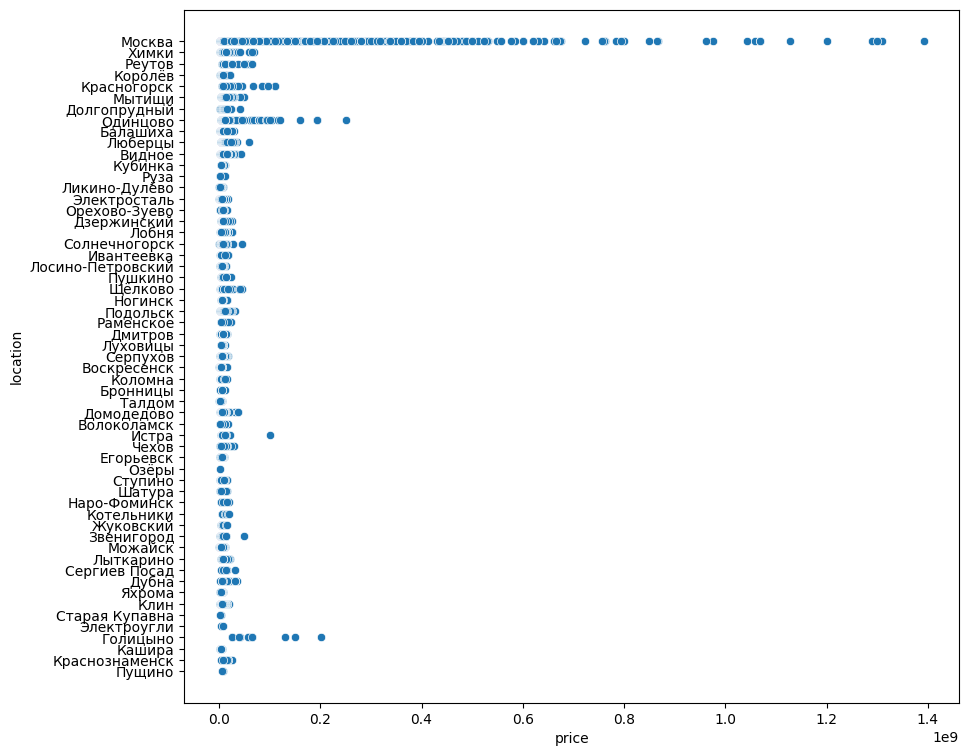

In [438]:
# график распределения цен относительно городов
plt.figure(figsize=(10, 9))
sns.scatterplot(data=df, x="price", y="location")

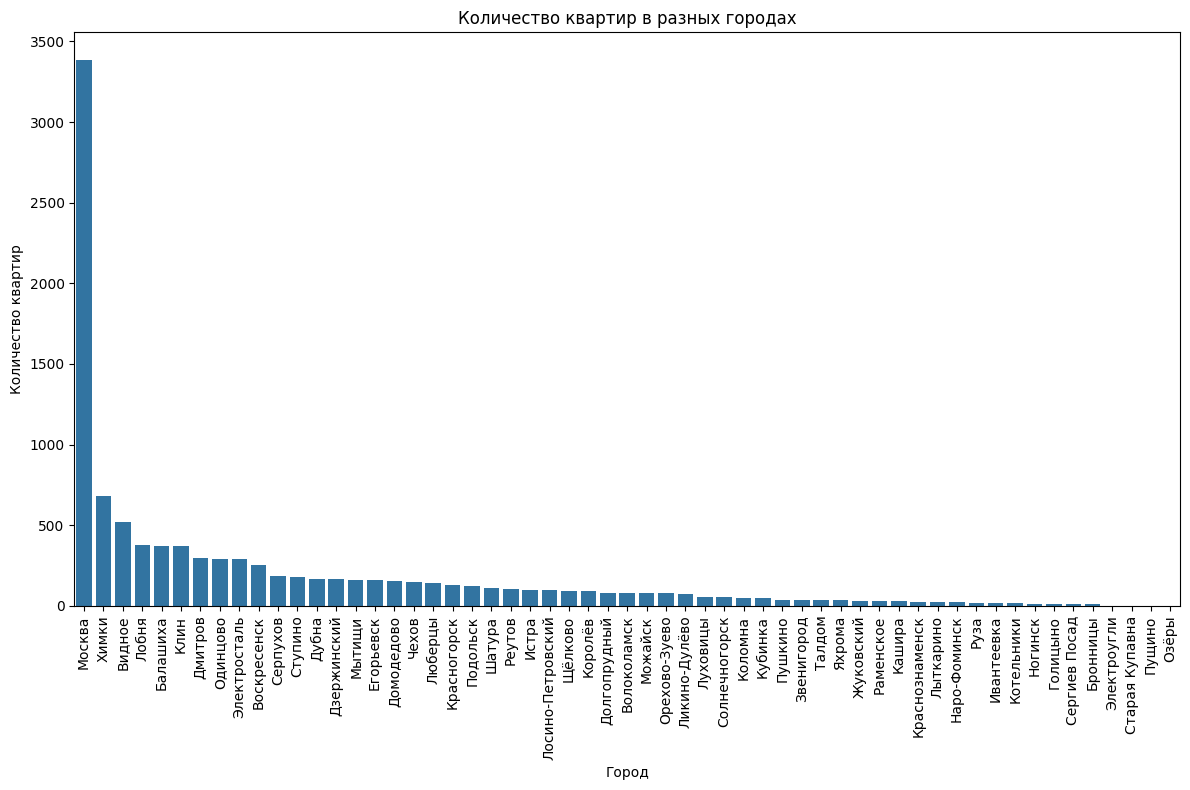

In [439]:
# график, отображающий распределение количества квартир относительно городов
plt.figure(figsize=(12, 8))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index)
plt.title('Количество квартир в разных городах')
plt.xlabel('Город')
plt.ylabel('Количество квартир')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

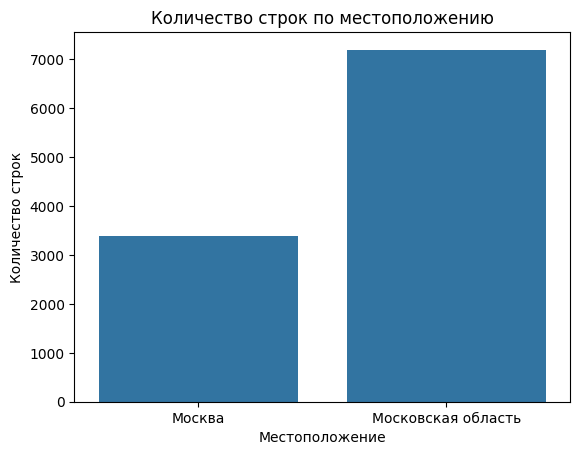

In [440]:
# график, отображающий распределение количества квартир в датасете между Москвой и Московской областью
# для того, чтобы отобразить количество по всей московской области, а не по отдельным городам создаю новую колонку в датасете, которая проверяет
# откуда обьявление - из Москвы или из городов Московской области
df['location_new'] = df['location'].apply(lambda x: 'Москва' if x == 'Москва' else 'Московская область')

sns.countplot(x='location_new', data=df)
plt.title('Количество строк по местоположению')
plt.xlabel('Местоположение')
plt.ylabel('Количество строк')
plt.show()

<Axes: >

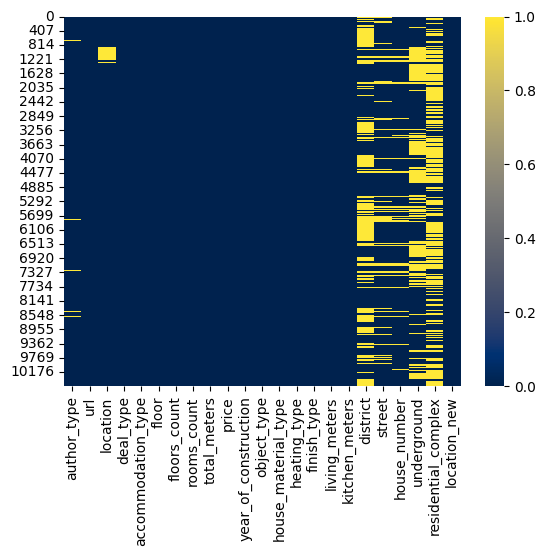

In [441]:
# график (тепловая карта) для просмотра пропущенных значений (но полностью верить мы ему не можем, потому что пропущенные значения 
# у нас могут быть обозначены значением "-1", это мы узнали на моменте сбора данных)
sns.heatmap(df.isnull(),cmap='cividis') 